In [1]:
from sklearn.metrics import pairwise_distances
import numpy as np

In [2]:
class MDS_:
    def __init__(self, n_components=2, lr=1e-3, max_iter=300):
        self._n_components = n_components
        self._lr = lr
        self._max_iter = max_iter

        self._x_distances = None
        self._b_matrix = None
        self._v_matrix = None
        self._z_matrix = None

    def stress(self):
        """
        Compute the stress
        """
        z_distances = pairwise_distances(self._z_matrix)
        s = 0
        
        for i in range(self._size):
             for j in range(0,i):
                    s += (z_distances[i][j] - self._x_distances[i][j])**2
                 
        return np.sqrt(s)   

    def _compute_gradient(self):
        """
        Compute the gradient

        TODO: implement
        """
        return  2*self._v_matrix@self._z_matrix -2*self._b_matrix@self._z_matrix
    
    def _compute_v_matrix(self):
        """
        TODO: implement
        """
        matrix = np.array([-1 for i in range(self._size) for j in range(self._size)]).reshape(self._size,self._size)
        np.fill_diagonal(matrix,self._size - 1)
        
        return matrix

    def _compute_b_matrix(self):
        """
        TODO: implement
        """
        
        z_distances = pairwise_distances(self._z_matrix)
        matrix = np.zeros((self._size, self._size))
        
        for i in range(self._size):
            for j in range(self._size):
                if i != j and z_distances[i][j] != 0:
                    matrix[i][j] =  -self._x_distances[i][j]/z_distances[i][j]
                    
        diag = matrix.sum(axis=1)
        diag *= -1
        np.fill_diagonal(matrix,diag)
        
        self._b_matrix = matrix
            
       
    def fit_transform(self, x):
        self._size, _ = x.shape
        self._x_distances = pairwise_distances(x)
        self._z_matrix = np.random.random(self._size * self._n_components).reshape((self._size, self._n_components))  # compute via x
        self._v_matrix = self._compute_v_matrix() 
        
        for _ in range(self._max_iter):
            self._compute_b_matrix()
            self._z_matrix -= self._lr * self._compute_gradient()
        
        return self._z_matrix


In [3]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


In [4]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [5]:
model = MDS_()
principalComponents = model.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [6]:
model.stress()

23.832858089881714

In [7]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

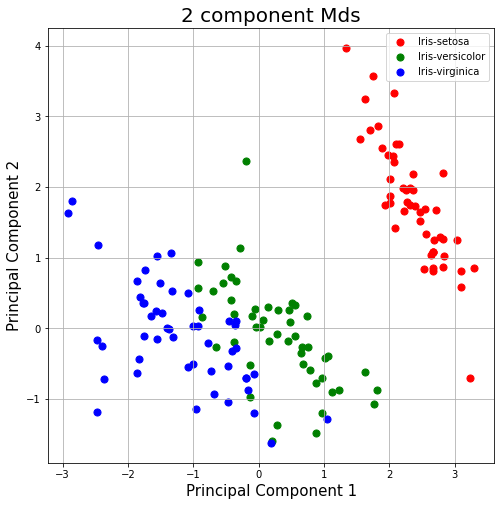

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component Mds', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [9]:
from sklearn.manifold import MDS
model = MDS()
principalComponents = model.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [10]:
principalDf

,principal component 1,principal component 2
0,-1.884452,-1.380252
1,-0.869688,-2.022668
2,-1.328658,-2.005221
3,-1.085209,-2.138862
4,-2.093015,-1.368529
...,...,...
145,0.905383,1.720404
146,1.745728,0.565750
147,0.792762,1.338658
148,-0.149532,1.901921


In [11]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

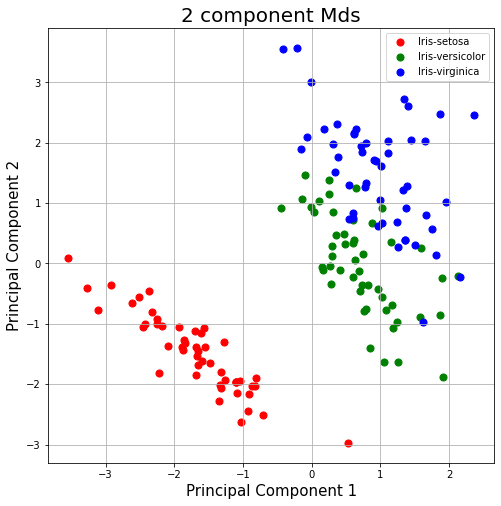

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component Mds', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [16]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)

    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]



In [18]:
x = make_hello()

In [ ]:
ax = plt.axes()
ax.scatter(x[:,0], ydata, zdata, c=zdata, cmap='Greens');
